In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.dates as mdates

from dateutil import parser
from matplotlib import pyplot as plt

names = "M11,M12,M13,M14,M15,M16,M21,M22,M23,M24,M25,M26,M31,M32,M33,M34,M35,M36,M41,M42,M43,M44,M45,M46,M51,M52,M53,M54,M55,M56,M61,M62,M63,M64,M65,M66".split(",")
names_of_motives = dict(zip(map(str,range(1,len(names)+1)),names))

% matplotlib inline 

In [2]:
os.listdir(".")

['CheckBigClam-Copy1.ipynb',
 '.DS_Store',
 'graph-dynamics',
 'CheckBigClam-Copy2.ipynb',
 '.ipynb_checkpoints',
 'data',
 'CheckBigClam.ipynb']

In [10]:
# !head 'daymodel122_gGD_0_.bigclam-c-1000f_matrix.txt'

In [65]:
file1 = "data/daymodel122_gGD_0_.bigclam-c-1000f_matrix.txt"
file2 = "data/daymodel165_gGD_0_.bigclam-c-1000f_matrix.txt"
file3 = "data/daymodel210_gGD_0_.bigclam-c-1000f_matrix.txt"
file4 = "data/activitydrivenBigclam151574987200_gGD_0_.matrixf_matrix.txt"
file5= "data/memoryallBigclam151575059300_gGD_0_.matrixf_matrix.txt"

file_open = file5

f = open(file_open)
WEIGHTS = []
i = 0
for line in f:
    WEIGHTS.append(max(map(float,line.split())))
    i+=1
f.close()

In [66]:
np.asarray(WEIGHTS).mean()

0.762093044

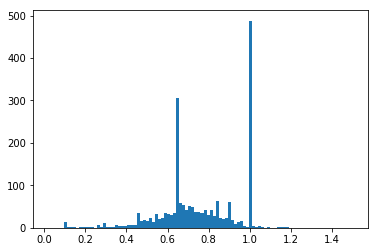

In [67]:
stuff = plt.hist(WEIGHTS,range=(0.02,1.5),bins=100)
# plt.yscale("log")
# plt.xscale("log")

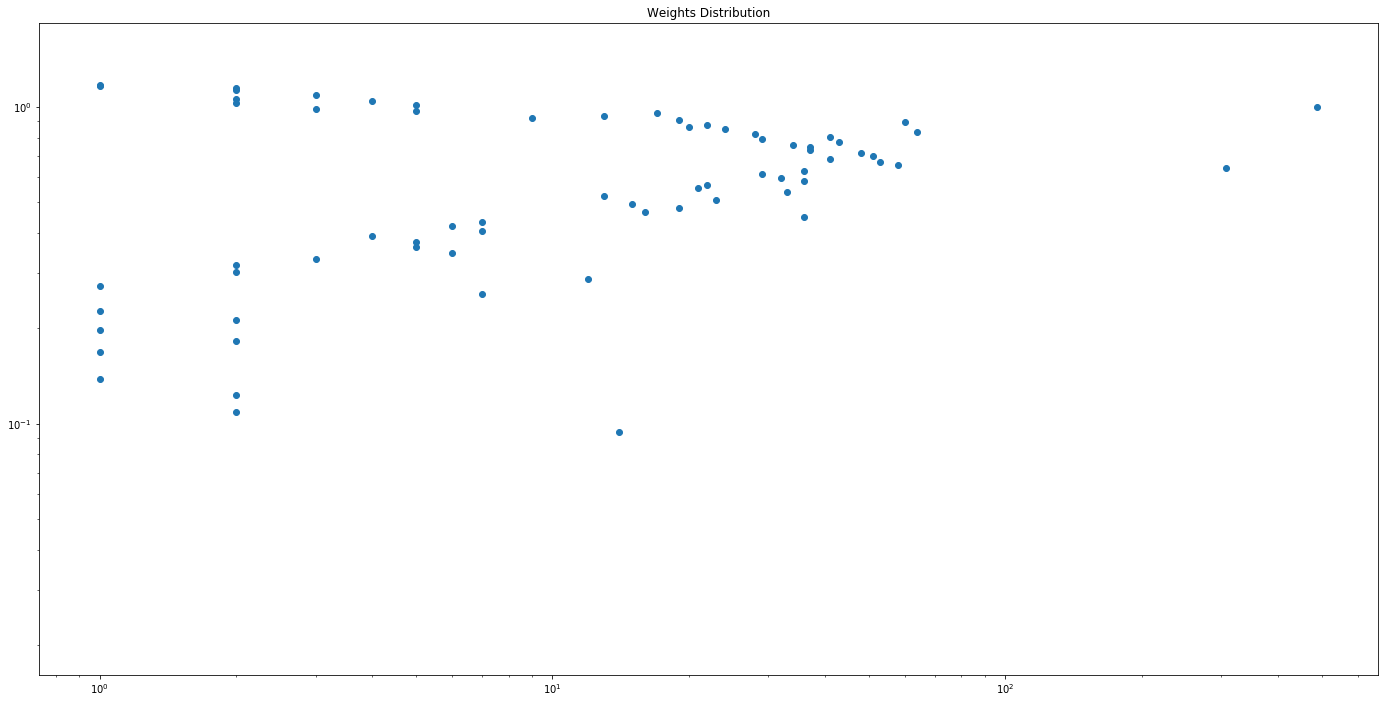

In [68]:
a, b, c = stuff
b = b[:-1]
plt.figure(figsize=(24,12))
plt.title("Weights Distribution")
plt.plot(a,b,"o")
plt.yscale("log")
plt.xscale("log")

plt.savefig(file_open.replace(".txt", ".png"))

In [69]:
from scipy import stats
from scipy.stats import norm, pareto, lognorm, gamma, weibull_min, weibull_max, gengamma, expon
import numpy as np
from scipy.stats import kstest

In [70]:
WEIGHTS = [a for a in WEIGHTS if a > 0.02]

In [71]:
parameters = stats.norm.fit(WEIGHTS)
kt0, p_value0 =  kstest(WEIGHTS,"norm",parameters)
print kt0
print p_value0

0.132319092115
0.0


In [72]:
parameters = stats.lognorm.fit(WEIGHTS)
kt1, p_value1 =  kstest(WEIGHTS,"lognorm",parameters)
print kt1
print p_value1

0.131860953637
0.0


In [73]:
parameters = stats.pareto.fit(WEIGHTS)
kt2, p_value2 =  kstest(WEIGHTS,"pareto",parameters)
print kt2
print p_value2

0.382039490922
0.0


In [74]:
parameters = stats.gamma.fit(WEIGHTS)
kt3, p_value3 =  kstest(WEIGHTS,"gamma",parameters)
print kt3
print p_value3

0.131894470667
0.0


In [29]:
a = "https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test"

$$
\rho_{uv} = 1 - e^{-F_{uc} F_{vc}}
$$

$$
P(A|\rho)= \prod_{j<i}p_{ij}^{A_{ij}}(1-p_{ij})^{1-A_{ij}}
$$
